In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import axes3d
import sklearn.datasets as dt
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
from IPython.display import clear_output
import datetime
import hashlib
sns.set()

In [2]:
def norcampo (df):
    
    for i in df.columns:
        if i == "Energy_type":
            df.rename(columns={i:"Combustible"}, inplace=True)
        elif "Energ" in i:
            nom = i + " " + "TWh"
            df[nom] = df[i] / 3.412e+12

    return df

D:\emissionsmap\documentation\TablasNormal\primary-energy.csv

In [3]:
datos = pd.read_csv('D:\emissionsmap\documentation\data\energyco2.csv', sep=',', low_memory=False, encoding='utf-8')

In [4]:
datosWorld = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] != 'World')]
datosCountry = datos[(datos['Energy_type'] == 'all_energy_types') & (datos['Country'] == 'World')]

In [5]:
datosWorld.drop(columns={'Unnamed: 0'}, inplace=True)
#datosCountry.drop(columns={'Unnamed: 0'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\1383027141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosWorld.drop(columns={'Unnamed: 0'}, inplace=True)


In [6]:
datosWorld.isnull().sum() # cantidad de datos faltantes en cada columna

Country                           0
Energy_type                       0
Year                              0
Energy_consumption              647
Energy_production               647
GDP                            2569
Population                     1571
Energy_intensity_per_capita     847
Energy_intensity_by_GDP         847
CO2_emission                    869
dtype: int64

In [7]:
datosWorld.isnull().sum().sum() #total de datos faltantes

7997

In [8]:
datosWorld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 6 to 55434
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      9200 non-null   object 
 1   Energy_type                  9200 non-null   object 
 2   Year                         9200 non-null   int64  
 3   Energy_consumption           8553 non-null   float64
 4   Energy_production            8553 non-null   float64
 5   GDP                          6631 non-null   float64
 6   Population                   7629 non-null   float64
 7   Energy_intensity_per_capita  8353 non-null   float64
 8   Energy_intensity_by_GDP      8353 non-null   float64
 9   CO2_emission                 8331 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 790.6+ KB


In [9]:
datosWorld['Id']  = datosWorld['Year'].apply(lambda x: str(x))
datosWorld['Id_fin'] = datosWorld['Id'] + datosWorld['Country']

C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\2450735850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosWorld['Id']  = datosWorld['Year'].apply(lambda x: str(x))
C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\2450735850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosWorld['Id_fin'] = datosWorld['Id'] + datosWorld['Country']


In [10]:
datosWorld['Id_hash'] = datosWorld['Id_fin'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\518957544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosWorld['Id_hash'] = datosWorld['Id_fin'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())


In [11]:
col = datosWorld.pop("Id_hash")
datosWorld.insert(3, col.name, col)


In [12]:
datosWorld = datosWorld.drop(columns=['Id', 'Id_fin'])
data_fin = datosWorld

In [13]:
datosWorld = datosWorld.drop(columns=['Country', 'Energy_type', 'Year'])

In [14]:
datosWorld.reset_index(inplace=True, drop=True)

In [15]:
datosWorld

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,2ecafd051f51dfb0f62b8ea2180c2590,0.026583,0.072561,NaN,13356.500,1.990283,0.000000,NaN
1,3bce3ee1ec02d4da99a91a238fca3cd0,0.162982,0.155562,NaN,2682.700,60.752906,0.000000,NaN
2,3a0432f7cf6e15e3493e5e061a2acad0,0.780695,2.803017,NaN,19221.700,40.615303,0.000000,NaN
3,fbbe8dcba0b3ef5aed7328916301e503,0.005893,0.000000,NaN,32.646,180.515604,0.000000,NaN
4,292a7d7b0907c5eca7e35d3825f09b0b,0.058366,0.335098,NaN,8341.290,6.997257,0.000000,NaN
...,...,...,...,...,...,...,...,...
9195,245124a1c823dc26c546284c073a60fb,0.019436,0.000000,NaN,NaN,0.000000,0.000000,1.273787
9196,4b6bd0969e31290698ac477e04e3a7cc,0.003712,0.000000,NaN,NaN,0.000000,0.000000,0.263038
9197,5cdac236da06100ca5ed65f07395268e,0.159020,0.133273,53.0838,29162.200,5.452938,2.995635,8.292505
9198,9bfb0677f9a1f98458fe74f88825dc4f,0.207097,0.148004,247.1819,17873.850,11.586567,0.837831,7.096290


In [16]:
columnas = datosWorld.columns

In [17]:
#conjunto de variables de entrada
X = datosWorld.iloc[:,1:].values

In [18]:
X

array([[2.65832167e-02, 7.25611561e-02,            nan, ...,
        1.99028313e+00, 0.00000000e+00,            nan],
       [1.62981822e-01, 1.55561620e-01,            nan, ...,
        6.07529063e+01, 0.00000000e+00,            nan],
       [7.80695167e-01, 2.80301736e+00,            nan, ...,
        4.06153029e+01, 0.00000000e+00,            nan],
       ...,
       [1.59019669e-01, 1.33273097e-01, 5.30838000e+01, ...,
        5.45293802e+00, 2.99563462e+00, 8.29250523e+00],
       [2.07096557e-01, 1.48003794e-01, 2.47181900e+02, ...,
        1.15865668e+01, 8.37830589e-01, 7.09628982e+00],
       [1.68650809e-01, 1.43462207e-01, 3.76204000e+01, ...,
        1.15087012e+01, 4.48296160e+00, 8.96475902e+00]])

In [19]:
Y = datosWorld.iloc[:,0].values

In [20]:
Y

array(['2ecafd051f51dfb0f62b8ea2180c2590',
       '3bce3ee1ec02d4da99a91a238fca3cd0',
       '3a0432f7cf6e15e3493e5e061a2acad0', ...,
       '5cdac236da06100ca5ed65f07395268e',
       '9bfb0677f9a1f98458fe74f88825dc4f',
       '3997c7c7530d0771409d285a6e1c265a'], dtype=object)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [23]:
from sklearn.impute import KNNImputer

In [24]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [25]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

In [27]:
X = pd.concat([X_train, X_test], axis=0)
Y = pd.concat([Y_train, Y_test], axis=0)

In [28]:
X

,0,1,2,3,4,5,6
0,0.060156,0.047512,24.489900,6046.630,9.948725,2.456370,0.589694
1,0.011389,0.007745,2.449950,345.707,32.944084,4.648667,0.476432
2,0.281137,0.140222,67.420600,2065.900,136.084723,4.169904,12.808097
3,0.250074,0.133071,36.120100,1989.480,125.698324,6.923411,13.835169
4,0.129607,0.125356,34.708700,2886.430,44.902313,3.734147,3.913786
...,...,...,...,...,...,...,...
1835,0.002405,0.000049,1.817910,689.696,3.486407,1.322706,0.200000
1836,0.010710,0.000000,14.370044,3707.510,2.888800,0.000000,0.700000
1837,0.011852,0.000000,6.169298,347.754,34.081319,0.000000,0.800000
1838,0.002714,0.000000,1.611350,913.404,2.971643,1.684495,0.100000


In [29]:
Y

,0
0,70e3737a24b69110028c01798c59d365
1,4ba265962cfb21cf95d71d9764100aa0
2,b08dc2cc47d955166f23c0549bb79361
3,13dbbec7c590b51c0af830a1e75fe86a
4,dd9bc7abdf9ac35c262ef8b1780033e2
...,...
1835,0253e7c57f6d106983427f71da6ba4ae
1836,1c9ccd70b93a2f8aa94b91e742d25a8f
1837,7248313342e5843324cb37f12d913edc
1838,49f1d37766ee34d702ede384779989bb


In [30]:
data = pd.concat([Y, X], axis=1)

In [31]:
data

,0,0,1,2,3,4,5,6
0,70e3737a24b69110028c01798c59d365,0.060156,0.047512,24.489900,6046.630,9.948725,2.456370,0.589694
1,4ba265962cfb21cf95d71d9764100aa0,0.011389,0.007745,2.449950,345.707,32.944084,4.648667,0.476432
2,b08dc2cc47d955166f23c0549bb79361,0.281137,0.140222,67.420600,2065.900,136.084723,4.169904,12.808097
3,13dbbec7c590b51c0af830a1e75fe86a,0.250074,0.133071,36.120100,1989.480,125.698324,6.923411,13.835169
4,dd9bc7abdf9ac35c262ef8b1780033e2,0.129607,0.125356,34.708700,2886.430,44.902313,3.734147,3.913786
...,...,...,...,...,...,...,...,...
1835,0253e7c57f6d106983427f71da6ba4ae,0.002405,0.000049,1.817910,689.696,3.486407,1.322706,0.200000
1836,1c9ccd70b93a2f8aa94b91e742d25a8f,0.010710,0.000000,14.370044,3707.510,2.888800,0.000000,0.700000
1837,7248313342e5843324cb37f12d913edc,0.011852,0.000000,6.169298,347.754,34.081319,0.000000,0.800000
1838,49f1d37766ee34d702ede384779989bb,0.002714,0.000000,1.611350,913.404,2.971643,1.684495,0.100000


In [32]:
data.columns = columnas

In [33]:
data

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,70e3737a24b69110028c01798c59d365,0.060156,0.047512,24.489900,6046.630,9.948725,2.456370,0.589694
1,4ba265962cfb21cf95d71d9764100aa0,0.011389,0.007745,2.449950,345.707,32.944084,4.648667,0.476432
2,b08dc2cc47d955166f23c0549bb79361,0.281137,0.140222,67.420600,2065.900,136.084723,4.169904,12.808097
3,13dbbec7c590b51c0af830a1e75fe86a,0.250074,0.133071,36.120100,1989.480,125.698324,6.923411,13.835169
4,dd9bc7abdf9ac35c262ef8b1780033e2,0.129607,0.125356,34.708700,2886.430,44.902313,3.734147,3.913786
...,...,...,...,...,...,...,...,...
1835,0253e7c57f6d106983427f71da6ba4ae,0.002405,0.000049,1.817910,689.696,3.486407,1.322706,0.200000
1836,1c9ccd70b93a2f8aa94b91e742d25a8f,0.010710,0.000000,14.370044,3707.510,2.888800,0.000000,0.700000
1837,7248313342e5843324cb37f12d913edc,0.011852,0.000000,6.169298,347.754,34.081319,0.000000,0.800000
1838,49f1d37766ee34d702ede384779989bb,0.002714,0.000000,1.611350,913.404,2.971643,1.684495,0.100000


In [34]:
data = norcampo(data)

In [35]:
data

,Id_hash,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh
0,70e3737a24b69110028c01798c59d365,0.060156,0.047512,24.489900,6046.630,9.948725,2.456370,0.589694,1.763079e-14,1.392484e-14,2.915805e-12,7.199209e-13
1,4ba265962cfb21cf95d71d9764100aa0,0.011389,0.007745,2.449950,345.707,32.944084,4.648667,0.476432,3.337925e-15,2.270017e-15,9.655359e-12,1.362446e-12
2,b08dc2cc47d955166f23c0549bb79361,0.281137,0.140222,67.420600,2065.900,136.084723,4.169904,12.808097,8.239667e-14,4.109671e-14,3.988415e-11,1.222129e-12
3,13dbbec7c590b51c0af830a1e75fe86a,0.250074,0.133071,36.120100,1989.480,125.698324,6.923411,13.835169,7.329259e-14,3.900079e-14,3.684007e-11,2.029136e-12
4,dd9bc7abdf9ac35c262ef8b1780033e2,0.129607,0.125356,34.708700,2886.430,44.902313,3.734147,3.913786,3.798575e-14,3.673981e-14,1.316012e-11,1.094416e-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1835,0253e7c57f6d106983427f71da6ba4ae,0.002405,0.000049,1.817910,689.696,3.486407,1.322706,0.200000,7.047365e-16,1.429660e-17,1.021807e-12,3.876630e-13
1836,1c9ccd70b93a2f8aa94b91e742d25a8f,0.010710,0.000000,14.370044,3707.510,2.888800,0.000000,0.700000,3.138997e-15,0.000000e+00,8.466590e-13,0.000000e+00
1837,7248313342e5843324cb37f12d913edc,0.011852,0.000000,6.169298,347.754,34.081319,0.000000,0.800000,3.473598e-15,0.000000e+00,9.988663e-12,0.000000e+00
1838,49f1d37766ee34d702ede384779989bb,0.002714,0.000000,1.611350,913.404,2.971643,1.684495,0.100000,7.955188e-16,0.000000e+00,8.709386e-13,4.936971e-13


In [36]:
co = ['Id_hash', 'Energy_consumption TWh', 'Energy_production TWh', 'Energy_intensity_per_capita TWh', 'Energy_intensity_by_GDP TWh', 'CO2_emission']

In [37]:
df_fin = pd.merge(data_fin[['Id_hash', 'Country', 'Energy_type', 'Year']], data[co], on=['Id_hash'], how='left')

In [38]:
df_fin.head(7)

,Id_hash,Country,Energy_type,Year,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh,CO2_emission
0,2ecafd051f51dfb0f62b8ea2180c2590,Afghanistan,all_energy_types,1980,7.791095e-15,2.126646e-14,5.833186e-13,0.0,1.122767
1,3bce3ee1ec02d4da99a91a238fca3cd0,Albania,all_energy_types,1980,4.776724e-14,4.559250e-14,1.780566e-11,0.0,10.216290
2,3a0432f7cf6e15e3493e5e061a2acad0,Algeria,all_energy_types,1980,2.288087e-13,8.215174e-13,1.190366e-11,0.0,111.010523
3,fbbe8dcba0b3ef5aed7328916301e503,American Samoa,all_energy_types,1980,1.727172e-15,0.000000e+00,5.290610e-11,0.0,0.426731
4,292a7d7b0907c5eca7e35d3825f09b0b,Angola,all_energy_types,1980,1.710614e-14,9.821162e-14,2.050779e-12,0.0,2.466803
5,e23dd669832a239454637e4be1dcf502,Antarctica,all_energy_types,1980,6.248388e-16,0.000000e+00,0.000000e+00,0.0,0.180000
6,5b90a78a960923b15bc9ef44dfd19d06,Antigua and Barbuda,all_energy_types,1980,1.701306e-15,0.000000e+00,0.000000e+00,0.0,0.380000


In [39]:
pruebas = df_fin.iloc[:,2:]

In [40]:
pruebas

,Energy_type,Year,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh,CO2_emission
0,all_energy_types,1980,7.791095e-15,2.126646e-14,5.833186e-13,0.000000e+00,1.122767
1,all_energy_types,1980,4.776724e-14,4.559250e-14,1.780566e-11,0.000000e+00,10.216290
2,all_energy_types,1980,2.288087e-13,8.215174e-13,1.190366e-11,0.000000e+00,111.010523
3,all_energy_types,1980,1.727172e-15,0.000000e+00,5.290610e-11,0.000000e+00,0.426731
4,all_energy_types,1980,1.710614e-14,9.821162e-14,2.050779e-12,0.000000e+00,2.466803
...,...,...,...,...,...,...,...
9195,all_energy_types,2019,5.696379e-15,0.000000e+00,0.000000e+00,0.000000e+00,1.273787
9196,all_energy_types,2019,1.087953e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.263038
9197,all_energy_types,2019,4.660600e-14,3.906011e-14,1.598165e-12,8.779703e-13,8.292505
9198,all_energy_types,2019,6.069653e-14,4.337743e-14,3.395828e-12,2.455541e-13,7.096290


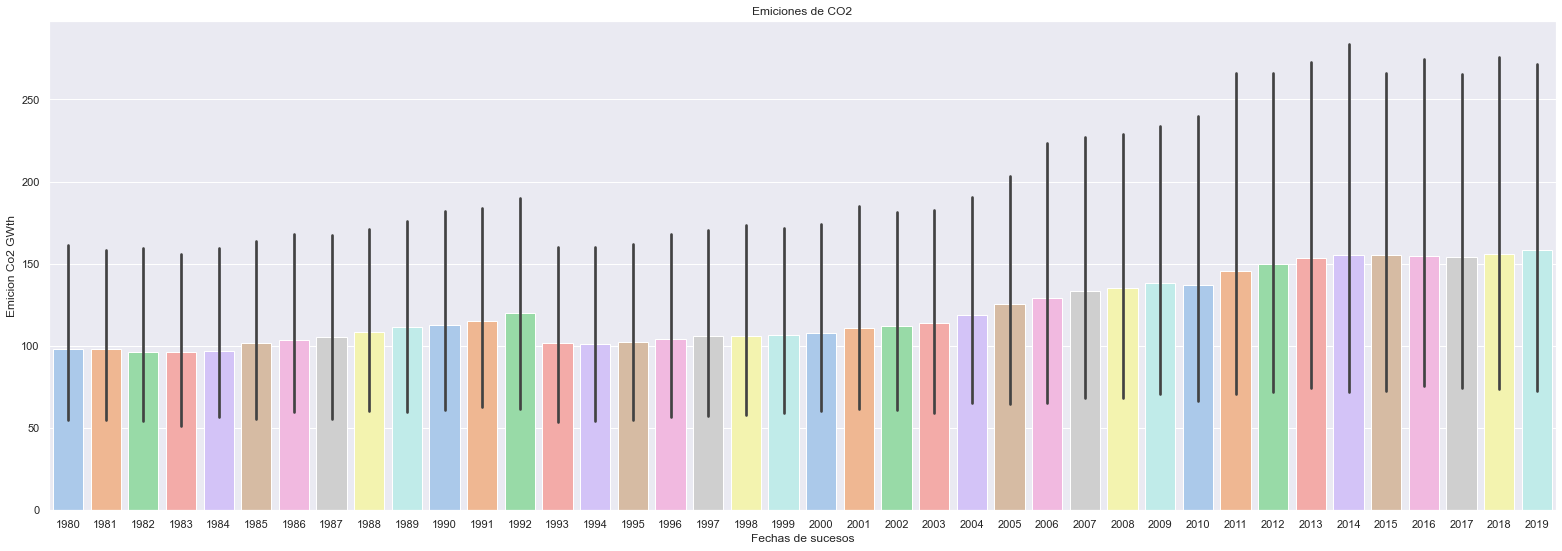

In [41]:
plt.figure(figsize=(27,9))
sns.barplot(data=df_fin, x="Year", y="CO2_emission", palette='pastel')
plt.title('Emiciones de CO2')
plt.xlabel('Fechas de sucesos')
plt.ylabel('Emicion Co2 GWth')
plt.show()

In [42]:
agrup = pruebas.groupby('Year')['CO2_emission'].sum()

In [43]:
agrup = agrup.reset_index()

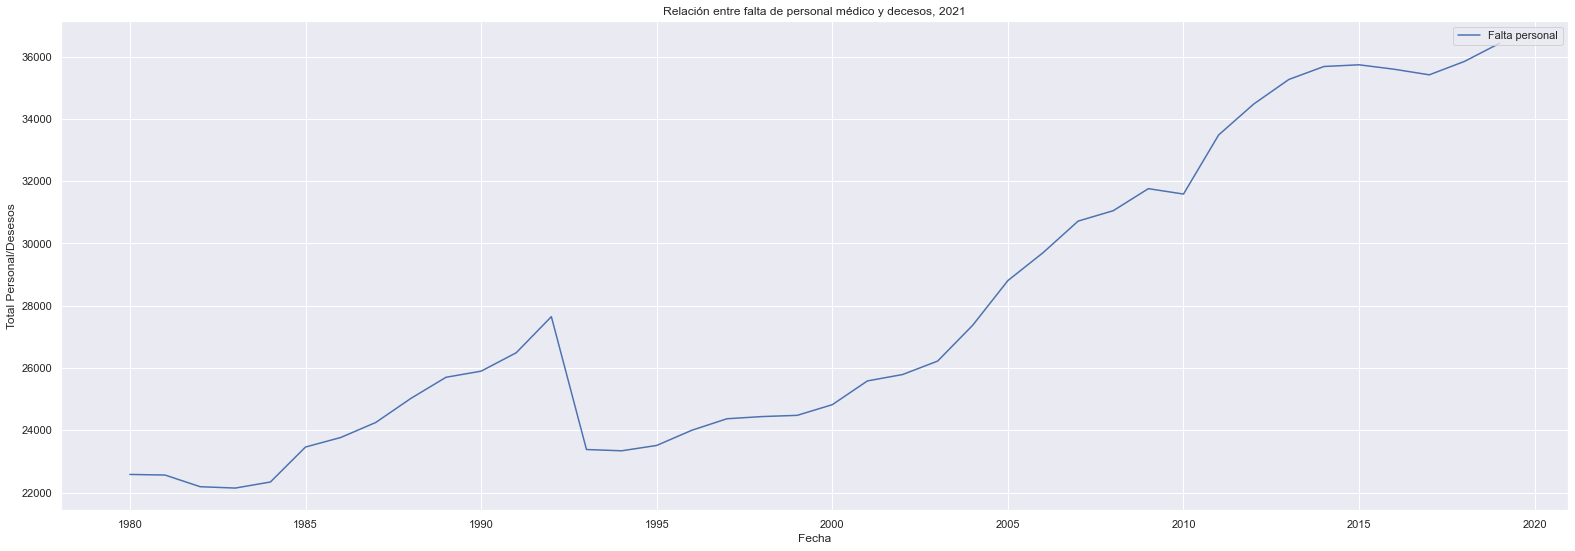

In [44]:
plt.figure(figsize=(27,9))
sns.lineplot(data=agrup, x='Year', y='CO2_emission', palette='pastel')

plt.title('Relación entre falta de personal médico y decesos, 2021')
plt.xlabel('Fecha')
plt.ylabel('Total Personal/Desesos')
plt.legend(['Falta personal', 'Deceso covid'], loc='upper right')
plt.show()

In [46]:
df_fin

,Id_hash,Country,Energy_type,Year,Energy_consumption TWh,Energy_production TWh,Energy_intensity_per_capita TWh,Energy_intensity_by_GDP TWh,CO2_emission
0,2ecafd051f51dfb0f62b8ea2180c2590,Afghanistan,all_energy_types,1980,7.791095e-15,2.126646e-14,5.833186e-13,0.000000e+00,1.122767
1,3bce3ee1ec02d4da99a91a238fca3cd0,Albania,all_energy_types,1980,4.776724e-14,4.559250e-14,1.780566e-11,0.000000e+00,10.216290
2,3a0432f7cf6e15e3493e5e061a2acad0,Algeria,all_energy_types,1980,2.288087e-13,8.215174e-13,1.190366e-11,0.000000e+00,111.010523
3,fbbe8dcba0b3ef5aed7328916301e503,American Samoa,all_energy_types,1980,1.727172e-15,0.000000e+00,5.290610e-11,0.000000e+00,0.426731
4,292a7d7b0907c5eca7e35d3825f09b0b,Angola,all_energy_types,1980,1.710614e-14,9.821162e-14,2.050779e-12,0.000000e+00,2.466803
...,...,...,...,...,...,...,...,...,...
9195,245124a1c823dc26c546284c073a60fb,Wake Island,all_energy_types,2019,5.696379e-15,0.000000e+00,0.000000e+00,0.000000e+00,1.273787
9196,4b6bd0969e31290698ac477e04e3a7cc,Western Sahara,all_energy_types,2019,1.087953e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.263038
9197,5cdac236da06100ca5ed65f07395268e,Yemen,all_energy_types,2019,4.660600e-14,3.906011e-14,1.598165e-12,8.779703e-13,8.292505
9198,9bfb0677f9a1f98458fe74f88825dc4f,Zambia,all_energy_types,2019,6.069653e-14,4.337743e-14,3.395828e-12,2.455541e-13,7.096290


In [54]:
df_fin_or = df_fin.groupby('Year')['Energy_consumption TWh', 'Energy_production TWh'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14596\2901821495.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
import plotly.offline as py
col=['Energy_consumption', 'Energy_production',
                 'Energy_intensity_per_capita']
py.iplot([{
    'x':df_fin_or.index,
    'y':df_fin_or[col],
    'name': col
} for col in  df_fin_or.columns], filename='cufflinks/multiple-lines-on-same-chart')

In [57]:
gdp = df_fin.groupby('Year')['Energy_intensity_by_GDP TWh'].sum()

In [63]:
gdp = pd.DataFrame(gdp)

In [65]:
import plotly.offline as py
col=['Energy_intensity_by_GDP Twh']
py.iplot([{
    'x':gdp.index,
    'y':gdp[col],
    'name': col
} for col in  gdp.columns], filename='cufflinks/multiple-lines-on-same-chart')

In [ ]:
import plotly.graph_objects as go

In [ ]:
def linealPlot(df_new):
    #df_new = df_new[(df_new["País"] == "World") & (df_new["Tipo_Energia"] == "all_energy_types")]
    #df_new = df_new[["País", "Year", "CO2_emission"]]
    fig= go.Figure(data=[
        go.Scatter(
        x=df_new['Year'],
        y=df_new['CO2_emission'],
        mode='lines', 
        name='Emisiones Co2',
        line=dict(color='cyan')
        )
    ])
    fig.update_layout(
        height=300, width=1000,
        plot_bgcolor='black',
        paper_bgcolor= 'black',
        font_color='#cee3e1',
        legend=dict(
            x=0.05,
            y=1,
            title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=12,
                color="LightSteelBlue"
            ),
            bgcolor="Black",
            bordercolor="LightSteelBlue",
            borderwidth=1
        ),
        xaxis=dict(showgrid=False,showline=True,linecolor='rgb(255,255,255)'),
        yaxis=dict(showgrid=False),
        margin=dict(l=10,r=10,b=10,t=10)
    )
    return fig

In [ ]:
linealPlot(agrup)

In [ ]:
agrup

,Year,CO2_emission
0,1980,22515.526117
1,1981,22793.185797
2,1982,22418.625375
3,1983,22375.213750
4,1984,22569.723621
5,1985,23693.758774
6,1986,23991.071222
7,1987,24474.732453
8,1988,25255.051964
9,1989,25933.753458


In [ ]:
import folium


m = folium.Map(location=[40.965, -5.664])

In [ ]:
m